**Nota técnica**: Este proyecto fue desarrollado en un entorno local con **Python 3.13.2**.  
Las bibliotecas utilizadas son compatibles con Python 3.10+.


# Proyecto Sprint 9 – Introducción al Machine Learning

## 1. Introducción

Megaline quiere recomendar a sus clientes el plan más adecuado entre dos opciones: *Smart* o *Ultra*. Para ello, desarrollaremos un modelo de clasificación binaria que, con base en el comportamiento mensual de los usuarios, prediga el plan óptimo.

- **Tipo de tarea:** Clasificación
- **Variable objetivo:** `is_ultra` (1 = Ultra, 0 = Smart)
- **Métrica principal:** Exactitud (accuracy)
- **Umbral de exactitud requerido:** ≥ 0.75

# Proyecto Sprint 9 – Introducción al Machine Learning

## 1. Introducción

Megaline quiere recomendar a sus clientes el plan más adecuado entre dos opciones: *Smart* o *Ultra*. Para ello, desarrollaremos un modelo de clasificación binaria que, con base en el comportamiento mensual de los usuarios, prediga el plan óptimo.

- **Tipo de tarea:** Clasificación
- **Variable objetivo:** `is_ultra` (1 = Ultra, 0 = Smart)
- **Métrica principal:** Exactitud (accuracy)
- **Umbral de exactitud requerido:** ≥ 0.75

## 2. Importación de librerías

In [68]:
# Importa todas las librerías
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


## 3. Carga de los datos

In [69]:
# Carga el dataset
df = pd.read_csv('users_behavior.csv')


In [70]:
# Vista previa de los datos:
print('Inspección de las primeras filas del DataFrame:')
print()
print(df.head())
print()
print()
# Imprime la información general sobre el DataFrame "df"
print('Información general del Dataframe')
print()
print(df.info())
print()
print()
# Identifica filas duplicadas
print(f'Número de filas duplicadas: {df.duplicated().sum()}')
print()
print()
# Imprime la información resumida sobre el DataFrame
print('Estadísticas descriptivas')
print()
print(df.describe())


Inspección de las primeras filas del DataFrame:

   calls  minutes  messages   mb_used  is_ultra
0   40.0   311.90      83.0  19915.42         0
1   85.0   516.75      56.0  22696.96         0
2   77.0   467.66      86.0  21060.45         0
3  106.0   745.53      81.0   8437.39         1
4   66.0   418.74       1.0  14502.75         0


Información general del Dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB
None


Número de filas duplicadas: 0


Estadísticas descriptivas

             calls      minutes     messages       mb_used     is_ultra
count  3214.000000  3214.000000  3214.000000   3214.00000

## 4. Análisis Exploratorio y Preparación de Datos

Antes de entrenar nuestros modelos, realizamos una breve exploración del dataset para asegurarnos de su limpieza y coherencia:

- No existen valores nulos ni duplicados.
- Los valores en las variables `calls` y `messages` deben ser convertidos a enteros, ya que no se pueden realizar medias llamadas ni medios mensajes. Las convertiremos a `int`.
- Las variables `minutes` y `mb_used` se mantendrán como `float`, pues reflejan duración y consumo exactos.
- Se utiliza `describe()` para observar la distribución general de las variables numéricas y validar consistencia.

Una vez realizado esto, estaremos listos para separar las características (`features`) del objetivo (`target`).

In [71]:
# Convierte los valores en "calls" y "messages" a enteros
df['calls'] = df['calls'].astype(int)
df['messages'] = df['messages'].astype(int)

# Valida cambios
df.dtypes


calls         int64
minutes     float64
messages      int64
mb_used     float64
is_ultra      int64
dtype: object

## 5. División del Dataset

Dividiremos el dataset en tres conjuntos: *entrenamiento*, *validación* y *prueba*. Esto nos permitirá entrenar el modelo, ajustar hiperparámetros y evaluar su rendimiento final.

La distribución será:
- **60%** para entrenamiento
- **20%** para validación
- **20%** para prueba

Utilizamos la función `train_test_split()` de `sklearn.model_selection` y fijamos `random_state=12345` para asegurar la reproducibilidad de resultados.

In [72]:
# Separar el objetivo de las características
features = df.drop(columns='is_ultra')
target = df['is_ultra']

# Primera división: entrenamiento+validación (80%) y prueba (20%)
features_train_val, features_test, target_train_val, target_test = train_test_split(
    features, target, test_size=0.2, random_state=12345
    )


# Segunda división: entrenamiento (75% de 80% = 60%) y validación (25% de 80% = 20%)
features_train, features_valid, target_train, target_valid = train_test_split(
    features_train_val, target_train_val, test_size=0.25, random_state=12345
    )

# Comprueba las dimensiones
print('Tamaño del conjunto de entrenamiento:', features_train.shape)
print('Tamaño del conjunto de validación:', features_valid.shape)
print('Tamaño del conjunto de prueba:', features_test.shape)

Tamaño del conjunto de entrenamiento: (1928, 4)
Tamaño del conjunto de validación: (643, 4)
Tamaño del conjunto de prueba: (643, 4)


## 6. Primer Modelo: Árbol de Decisión

Como primer modelo base, utilizaremos un árbol de decisión con su configuración por defecto. Este modelo nos permitirá establecer un punto de comparación para modelos más complejos.

Entrenaremos el modelo con el conjunto de entrenamiento y evaluaremos su rendimiento con el conjunto de validación. La métrica usada será la **exactitud (accuracy)**.

In [73]:
# Crea el modelo
model_tree = DecisionTreeClassifier(random_state=12345)

# Entrena el modelo
model_tree.fit(features_train, target_train)

# Predecir en conjunto de validación
predictions_valid = model_tree.predict(features_valid)

# Calcular exactitud
accuracy = accuracy_score(target_valid, predictions_valid)

print("Exactitud del Árbol de Decisión (modelo base):", round(accuracy, 4))

Exactitud del Árbol de Decisión (modelo base): 0.7123


## 7. Ajuste del Árbol de Decisión: Prueba de diferentes profundidades

Ajustaremos el hiperparámetro `max_depth` del árbol de decisión para ver si mejora la exactitud del modelo.

Probaremos valores de profundidad del 1 al 10 y evaluaremos el rendimiento en el conjunto de validación.

In [74]:
best_depth = None
best_accuracy = 0

print('Profundidad  | Exactitud')
print('-' * 25)

for depth in range(1, 11):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    accuracy = accuracy_score(target_valid, predictions_valid)

    print(f'{depth:^12} | {accuracy:.4f}')

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_depth = depth

print('\nMejor profundidad:', best_depth)
print('Mejor exactitud en validación:', round(best_accuracy, 4))

Profundidad  | Exactitud
-------------------------
     1       | 0.7387
     2       | 0.7574
     3       | 0.7652
     4       | 0.7636
     5       | 0.7589
     6       | 0.7574
     7       | 0.7745
     8       | 0.7667
     9       | 0.7621
     10      | 0.7714

Mejor profundidad: 7
Mejor exactitud en validación: 0.7745


## 8. Visualización de la Exactitud vs. Profundidad del Árbol

Para identificar visualmente la mejor profundidad del árbol de decisión, graficaremos la exactitud obtenida en el conjunto de validación para cada valor de `max_depth`.

Esto nos ayuda a detectar tendencias y posibles síntomas de sobreajuste.


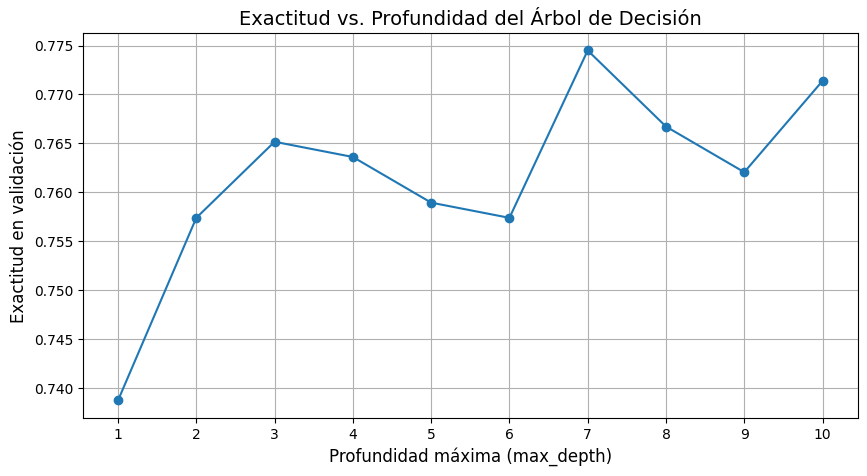

In [75]:
# Listas para guardar resultados
depths = []
accuracies = []

# Evalúa cada profundidad y guarda los resultados
for depth in range(1, 11):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    accuracy = accuracy_score(target_valid, predictions_valid)

    depths.append(depth)
    accuracies.append(accuracy)

# Crea figura y eje
fig, ax = plt.subplots(figsize=(10,5))

# Crear la línea
ax.plot(depths, accuracies, marker='o')

# Etiquetas y título
ax.set_title('Exactitud vs. Profundidad del Árbol de Decisión', fontsize=14)
ax.set_xlabel('Profundidad máxima (max_depth)', fontsize=12)
ax.set_ylabel('Exactitud en validación', fontsize=12)

# Marca puntos del eje X y agregar cuadrícula
ax.set_xticks(depths)
ax.grid(True)

# Muestra la gráfica
plt.show()

## 9. Modelo con Random Forest: Ajuste del número de estimadores

Probaremos distintos valores de `n_estimators` para el clasificador Random Forest y evaluaremos la exactitud en el conjunto de validación.

Esto nos permitirá identificar cuántos árboles logran el mejor equilibrio entre rendimiento y precisión.


In [76]:
best_est = None
best_score = 0

print('n_estimators  |  Exactitud')
print('-'*30)

for est in range(1, 21):
    model = RandomForestClassifier(random_state=12345, n_estimators=est)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    score = accuracy_score(target_valid, predictions_valid)

    print(f'{est:^13} |  {score:.4f}')

    if score > best_score:
        best_score = score
        best_est = est

print('\nMejor número de árboles:', best_est)
print(f'Mejor exactitud en validación: {best_score:.4f}')

n_estimators  |  Exactitud
------------------------------
      1       |  0.7030
      2       |  0.7574
      3       |  0.7449
      4       |  0.7652
      5       |  0.7621
      6       |  0.7698
      7       |  0.7714
      8       |  0.7869
      9       |  0.7838
     10       |  0.7885
     11       |  0.7807
     12       |  0.7823
     13       |  0.7776
     14       |  0.7854
     15       |  0.7838
     16       |  0.7838
     17       |  0.7776
     18       |  0.7869
     19       |  0.7869
     20       |  0.7900

Mejor número de árboles: 20
Mejor exactitud en validación: 0.7900


## 10. Visualización de la Exactitud vs. Número de Estimadores

Para identificar visualmente cuántos árboles generan el mejor rendimiento, graficaremos la exactitud obtenida en el conjunto de validación para cada valor de `n_estimators`.

Esto nos permitirá a detectar tendencias, mejorar la interpretación del modelo y elegir la configuración óptima. 

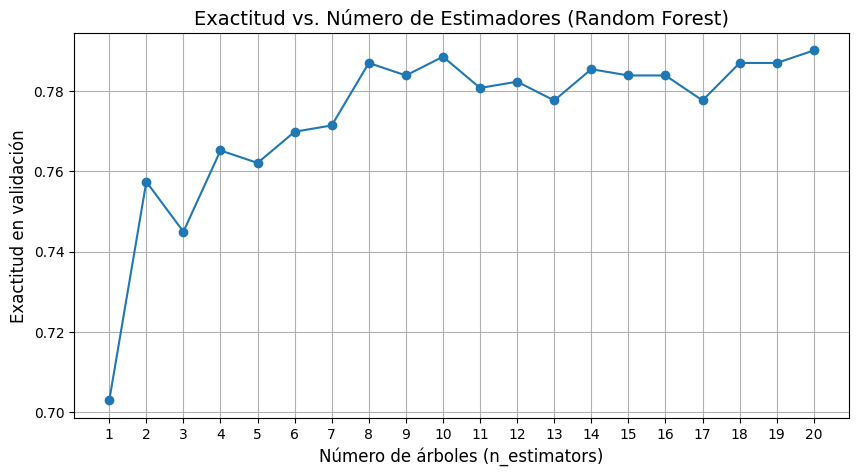

In [77]:
# Guarda los resultados para graficar
estimators = []
scores = []

for est in range(1, 21):
    model = RandomForestClassifier(random_state=12345, n_estimators=est)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    score = accuracy_score(target_valid, predictions_valid)

    estimators.append(est)
    scores.append(score)


# Crea gráfica
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(estimators, scores, marker='o')
ax.set_title('Exactitud vs. Número de Estimadores (Random Forest)', fontsize=14)
ax.set_xlabel('Número de árboles (n_estimators)', fontsize=12)
ax.set_ylabel('Exactitud en validación', fontsize=12)
ax.set_xticks(estimators)
ax.grid(True)

# Muestra el gráfico
plt.show()

## 11. Modelo con Regresión Logística

Como tercera alternativa, probaremos un modelo de regresión logística. Este tipo de modelo es útil para realizar una clasificación binaria y suele ofrecer buenos resultados cuando las relaciones entre variables son aproximadamente lineales.

Entrenaremos el modelo con el conjunto de entrenamiento y evaluaremos su exactitud con el conjunto de validación.


In [78]:
# Crea el modelo usando "lbfgs"
model_logreg = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)

# Entrena el modelo
model_logreg.fit(features_train, target_train)

# Predice en conjunto de validación
predictions_valid = model_logreg.predict(features_valid)

# Calcula exactitud
accuracy_logreg = accuracy_score(target_valid, predictions_valid)

print("Exactitud de Regresión Logística:", round(accuracy_logreg, 4))

Exactitud de Regresión Logística: 0.7263


In [79]:
# Crea el modelo usando "liblinear"
model_logreglib = LogisticRegression(random_state=12345, solver='liblinear')

# Entrena el modelo
model_logreglib.fit(features_train, target_train)

# Predice en conjunto de validación
predictions_valid_lib = model_logreglib.predict(features_valid)

# Calcula exactitud
accuracy_logreglib = accuracy_score(target_valid, predictions_valid_lib)

print("Exactitud de Regresión Logística:", round(accuracy_logreglib, 4))

Exactitud de Regresión Logística: 0.7294


**Observaciones**

Probamos el modelo de regresión logística con dos algoritmos de entrenamiento diferentes (`lbfgs` y `liblinear`), ambos recomendados para clasificación binaria.

Aunque sus resultados fueron muy similares, `liblinear` obtuvo una exactitud ligeramente mayor sobre el conjunto de validación, por lo que seleccionamos esta versión como la definitiva para esta técnica.

Dado que el propósito principal de este experimento es evaluar la precisión de clasificación, optamos por el *solver* con mejor rendimiento empírico en este caso específico.


## 12. Comparación de Modelos

Compararemos el rendimiento de los tres modelos entrenados (Árbol de Decisión, Bosque Aleatorio y Regresión Logística) utilizando el conjunto de validación.

El modelo con mayor exactitud será evaluado finalmente con el conjunto de prueba para determinar su capacidad de generalización (capacidad para realizar predicciones precisas al enfrentarse con información nueva y nunca antes vista).


In [80]:
# Comparación final en el dataset de validación

# Árbol de Decisión con mejor profundidad
best_tree = DecisionTreeClassifier(random_state=12345, max_depth=best_depth)
best_tree.fit(features_train, target_train)
pred_tree_valid = best_tree.predict(features_valid)
acc_tree = accuracy_score(target_valid, pred_tree_valid)

# Bosque aleatorio con mejor número de estimadores
best_forest = RandomForestClassifier(random_state=12345, n_estimators=best_est)
best_forest.fit(features_train, target_train)
pred_forest_valid = best_forest.predict(features_valid)
acc_forest = accuracy_score(target_valid, pred_forest_valid)

# Regresión logística (liblinear)
model_logreg_final = LogisticRegression(random_state=12345, solver='liblinear')
model_logreg_final.fit(features_train, target_train)
pred_logreg_valid = model_logreg_final.predict(features_valid)
acc_logreg = accuracy_score(target_valid, pred_logreg_valid)

# Muestra resultados
print('Exactitud - Árbol de Decisión:', round(acc_tree, 4))
print('Exactitud - Bosque Aleatorio:', round(acc_forest, 4))
print('Exactitud - Regresión Logísica:', round(acc_logreg, 4))

Exactitud - Árbol de Decisión: 0.7745
Exactitud - Bosque Aleatorio: 0.79
Exactitud - Regresión Logísica: 0.7294


In [81]:
# Eleccion del mejor modelo

# Crea un diccionario con los resultados
model_scores = {
    'Decision Tree': acc_tree,
    'Random Forest': acc_forest,
    'Logistic Regression': acc_logreg
}

# Elige el mejor modelo
best_model_name = max(model_scores, key=model_scores.get)
print('\nMejor modelo según la validación:', best_model_name)


Mejor modelo según la validación: Random Forest


In [82]:
# Evaluación final con conjunto de prueba
if best_model_name == 'Decision Tree':
    final_model = best_tree
elif best_model_name == 'RandomForest':
    final_model = best_forest
else:
    final_model = model_logreg_final

pred_test = final_model.predict(features_test)
acc_test = accuracy_score(target_test, pred_test)

print('\nExactitud final en el conjunto de prueba:', round(acc_test, 4))


Exactitud final en el conjunto de prueba: 0.7527


## 13. Evaluación Final del Modelo

Después de comparar el rendimiento de los tres modelos entrenados utilizando el conjunto de validación, seleccionamos el modelo con mayor exactitud para evaluarlo en el conjunto de prueba.

Los resultados en el conjunto de validación fueron los siguientes:

- Árbol de Decisión: 0.7745
- Bosque Aleatorio: 0.7900
- Regresión Logística: 0.7294

El modelo con mejor rendimiento fue: **Bosque Aleatorio**, por lo que fue el que utilizamos para predecir el conjunto de prueba.

### Resultado final:
**Exactitud del modelo en el conjunto de prueba: 0.7527**

Este valor cumple con el umbral establecido de 0.75, lo cual indica que el modelo es confiable para recomendar planes a clientes de Megaline con base en su comportamiento mensual.

El modelo demostró una buena capacidad de generalización y puede ser considerado como una solución viable para reemplazar los planes heredados por los planes *Smart* y *Ultra*.


## 14. Prueba de Cordura

Para confirmar que nuestro modelo realmente aprende de los datos y no actúa como una simple estrategia aleatoria, realizaremos una prueba de cordura.

Simularemos un modelo que predice al azar entre las clases disponibles (`0` y `1`) y comparamos su exactitud con la del modelo entrenado.

Si nuestro modelo tiene un desempeño significativamente mejor que el aleatorio (mayor a 0.5), podremos confirmar que **hay aprendizaje real** en lugar de azar.


In [83]:
# Semilla para reproducibilidad
np.random.seed(12345)

# Predicciones aleatorias (0 o 1 con igual probabilidad)
random_predictions = np.random.randint(0, 2, size=len(target_test))

# Evalúa la exactitud del modelo aleatorio
random_accuracy = accuracy_score(target_test, random_predictions)

print('Exactitud del modelo aleatorio:', round(random_accuracy, 4))
print('Exactitud del mejor modelo entrenado:', round(acc_test, 4))

Exactitud del modelo aleatorio: 0.4899
Exactitud del mejor modelo entrenado: 0.7527


## 15. Conclusiones del Proyecto

En este proyecto desarrollamos un modelo de clasificación binaria para predecir cuál de los nuevos planes de la compañía Megaline (Smart o Ultra) es más adecuado para cada cliente en función de su comportamiento mensual.

Durante el proceso:

- Se evaluaron tres modelos de clasificación: Árbol de Decisión, Bosque Aleatorio y Regresión Logística.
- Se ajustaron hiperparámetros clave (`max_depth` y `n_estimators`) para mejorar la exactitud de los modelos.
- El mejor rendimiento se obtuvo con el modelo de Bosque Aleatorio, alcanzando una exactitud de **0.7527** en el conjunto de prueba.
- Este valor **supera el umbral de exactitud del 75%** establecido como criterio mínimo de calidad.

Además, se realizó una **prueba de cordura**, utilizando un clasificador que asignaba clases al azar. El modelo aleatorio obtuvo una exactitud de **0.4899**, muy por debajo del rendimiento de nuestro modelo entrenado. Esto confirma que el modelo desarrollado **aprende patrones reales** en los datos y no depende del azar.

### Conclusión general:
El modelo de Bosque Aleatorio es una solución válida y efectiva para recomendar planes a los clientes de Megaline con base en su comportamiento, y puede ser implementado como parte de una estrategia para sustituir los planes heredados por opciones más rentables y adecuadas.
